In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#!head training_data.csv

In [3]:
training_data = pd.read_csv('training_data.csv')

In [4]:
df = training_data

In [5]:
numerical_cols = [
    'total_dmft_score', 'decayed_teeth', 'missing_teeth_count', 'filled_teeth',
    'sweet_sugary_foods_daily', 'sweet_sugary_foods_weekly', 'sweet_sugary_foods_timing', 'sweet_sugary_foods_bedtime',
    'takeaways_processed_foods_daily', 'takeaways_processed_foods_weekly',
    'fresh_fruit_daily', 'fresh_fruit_weekly', 'fresh_fruit_timing', 'fresh_fruit_bedtime',
    'cold_drinks_juices_daily', 'cold_drinks_juices_weekly', 'cold_drinks_juices_timing', 'cold_drinks_juices_bedtime',
    'processed_fruit_daily', 'processed_fruit_weekly', 'processed_fruit_timing', 'processed_fruit_bedtime',
    'spreads_daily', 'spreads_weekly', 'spreads_timing', 'spreads_bedtime',
    'added_sugars_daily', 'added_sugars_weekly', 'added_sugars_timing', 'added_sugars_bedtime',
    'salty_snacks_daily', 'salty_snacks_weekly', 'salty_snacks_timing',
    'dairy_products_daily', 'dairy_products_weekly',
    'vegetables_daily', 'vegetables_weekly',
    'water_timing', 'water_glasses'
]

categorical_cols = [
    'sa_citizen', 'special_needs', 'caregiver_treatment', 'appliance', 'plaque',
    'dry_mouth', 'enamel_defects', 'fluoride_water', 'fluoride_toothpaste',
    'topical_fluoride', 'regular_checkups', 'sealed_pits', 'restorative_procedures',
    'enamel_change', 'dentin_discoloration', 'white_spot_lesions', 'cavitated_lesions',
    'multiple_restorations', 'missing_teeth', 'has_dental_data', 'has_dietary_data',
    'sweet_sugary_foods', 'takeaways_processed_foods', 'fresh_fruit', 'cold_drinks_juices',
    'processed_fruit', 'spreads', 'added_sugars', 'salty_snacks', 'dairy_products',
    'vegetables', 'water', 'risk_level'
]

Identified numerical columns for histograms: ['total_dmft_score', 'sweet_sugary_foods_daily', 'sweet_sugary_foods_weekly', 'sweet_sugary_foods_timing', 'sweet_sugary_foods_bedtime', 'takeaways_processed_foods_daily', 'takeaways_processed_foods_weekly', 'fresh_fruit_daily', 'fresh_fruit_weekly', 'fresh_fruit_timing', 'fresh_fruit_bedtime', 'cold_drinks_juices_daily', 'cold_drinks_juices_weekly', 'cold_drinks_juices_timing', 'cold_drinks_juices_bedtime', 'processed_fruit_daily', 'processed_fruit_weekly', 'processed_fruit_timing', 'processed_fruit_bedtime', 'spreads_daily', 'spreads_weekly', 'spreads_timing', 'spreads_bedtime', 'added_sugars_daily', 'added_sugars_weekly', 'added_sugars_timing', 'added_sugars_bedtime', 'salty_snacks_daily', 'salty_snacks_weekly', 'salty_snacks_timing', 'dairy_products_daily', 'dairy_products_weekly', 'vegetables_daily', 'vegetables_weekly', 'water_timing', 'water_glasses']
Identified categorical columns for bar charts: ['sa_citizen', 'special_needs', 'care

C:\Users\vhuta\AppData\Local\Temp\ipykernel_11588\809563027.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_level', y=col, palette='viridis', order=['low', 'medium', 'high', 'very_high'])
C:\Users\vhuta\AppData\Local\Temp\ipykernel_11588\809563027.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_level', y=col, palette='viridis', order=['low', 'medium', 'high', 'very_high'])
C:\Users\vhuta\AppData\Local\Temp\ipykernel_11588\809563027.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ri

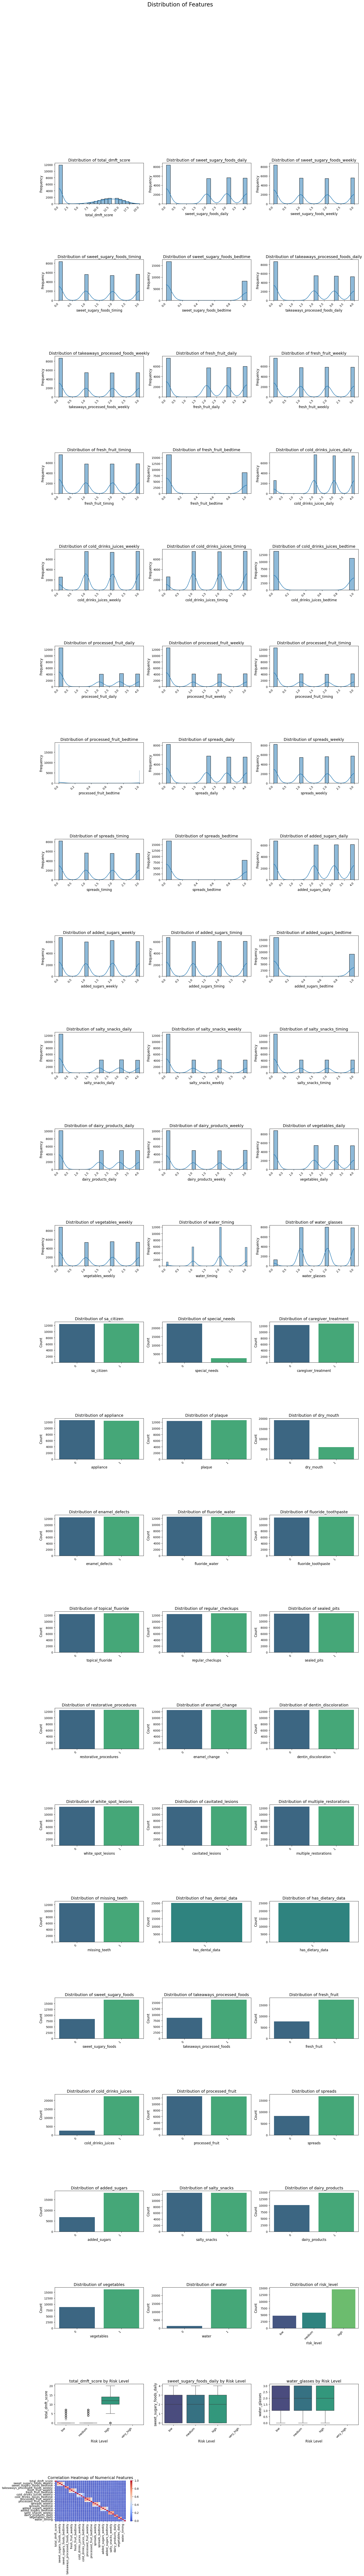

In [6]:
# Filter out any columns not present in the dataframe (just in case)
numerical_cols = [col for col in numerical_cols if col in df.columns]
categorical_cols = [col for col in categorical_cols if col in df.columns]

print(f"Identified numerical columns for histograms: {numerical_cols}")
print(f"Identified categorical columns for bar charts: {categorical_cols}")

# Set up the matplotlib figure and axes for plotting
# Determine the number of rows and columns for the subplots
# This will now include space for histograms, bar charts, box plots, and a heatmap
total_plots = len(numerical_cols) + len(categorical_cols) + len(numerical_cols) + 1 # +1 for heatmap
num_rows = (total_plots + 2) // 3 # Roughly 3 plots per row

plt.figure(figsize=(18, num_rows * 5)) # Adjust figure size dynamically
plt.suptitle('Distribution of Features', fontsize=20, y=1.02)

# --- Plot Histograms for Numerical Features ---
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i + 1) # Create subplot
    sns.histplot(data=df, x=col, kde=True) # Removed palette as it's ignored without hue
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# --- Plot Bar Charts for Categorical Features ---
# Continue indexing from where histograms left off
start_index_bar_charts = len(numerical_cols)
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, start_index_bar_charts + i + 1) # Create subplot
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False) # Added hue=col and legend=False
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# --- Plot Box Plots for Numerical Features against Risk Level ---
# Select a subset of numerical columns for box plots to avoid too many plots
# You can adjust this list as needed
box_plot_cols = ['total_dmft_score', 'decayed_teeth', 'filled_teeth', 'sweet_sugary_foods_daily', 'water_glasses']
box_plot_cols = [col for col in box_plot_cols if col in df.columns] # Ensure they exist

start_index_box_plots = start_index_bar_charts + len(categorical_cols)
if 'risk_level' in df.columns: # Ensure risk_level exists for box plots
    for i, col in enumerate(box_plot_cols):
        plt.subplot(num_rows, 3, start_index_box_plots + i + 1) # Create subplot
        sns.boxplot(data=df, x='risk_level', y=col, palette='viridis', order=['low', 'medium', 'high', 'very_high'])
        plt.title(f'{col} by Risk Level', fontsize=14)
        plt.xlabel('Risk Level', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(rotation=45, ha='right')

# --- Plot Heatmap for Numerical Feature Correlations ---
start_index_heatmap = start_index_box_plots + len(box_plot_cols)
plt.subplot(num_rows, 3, start_index_heatmap + 1) # Create subplot for heatmap

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent titles overlapping
plt.show()

